In [ ]:
##daten auslesen





path = r'D:\Impedanz\ImpedanzGit\impedanz\Sarah_Impedanz\sarah_nyquist\R_1MR_Moduled.txt'

# Liste zum Speichern der Werte in der zweiten Spalte
spalte_eins_x = [] #frequenz
spalte_zwei_y1 = [] #re
spalte_drei_y2 = [] #imag


# Textdokument öffnen und Zeilenweise lesen
with open(path, 'r') as datei:

    next(datei) #erste zeile überspringen

    for zeile in datei:
        # Die Zeile in Spalten aufteilen (angenommen, die Spalten sind durch Leerzeichen oder Tabulatoren getrennt)
        spalten = zeile.strip().split('\t')  # Hier aufpassen, wie die Spalten getrennt sind
        
        spalte_eins_x.append(float(spalten[0]))
        
        # Die anderen Spalten könnten Kommas enthalten, daher trennen wir sie weiter
        spalte2_und_3 = spalten[1].split(',')
        spalte_zwei_y1.append(float(spalte2_und_3[0]))
        spalte_drei_y2.append(float(spalte2_und_3[1]))


#print("Spalte 1:", spalte_drei_y2)
print(spalte_zwei_y1[0])

-999999.989893525


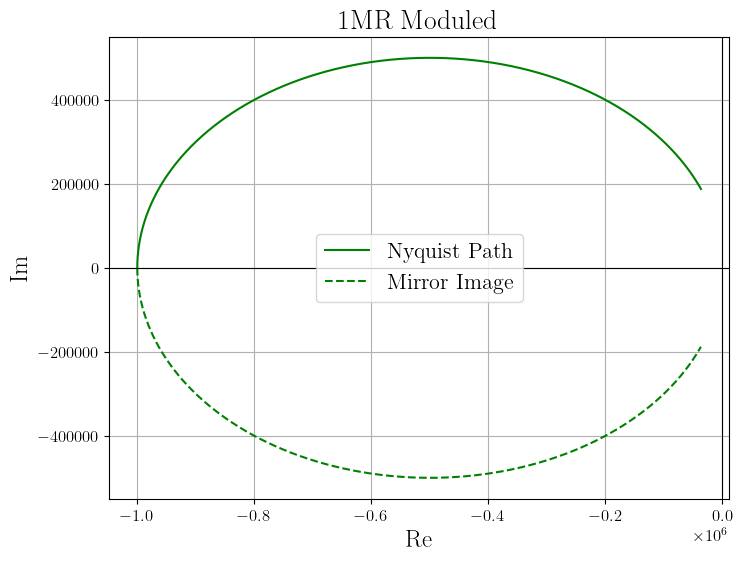

In [41]:
import numpy as np
import matplotlib.pyplot as plt


# # Enable LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# Globale Schriftgrößen ändern
plt.rcParams.update({
    'axes.titlesize': 20,  # Titel der Achsen
    'axes.labelsize': 18,  # Achsenbeschriftungen
    'xtick.labelsize': 12,  # X-Ticks
    'ytick.labelsize': 12,  # Y-Ticks
    'legend.fontsize': 16,  # Legende
    'font.size': 14         # Allgemeine Schriftgröße
})





# Funktion für Nyquist-Plot
def nyquist_plot(real, imag, title="Nyquist Plot", xlabel="Re", ylabel="Im", grid=True):
    """
    Plots a Nyquist diagram given the real and imaginary components of the transfer function.

    Parameters:
        real (array-like): Real part of the transfer function.
        imag (array-like): Imaginary part of the transfer function.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        grid (bool): Whether to display a grid (default: True).

    Returns:
        None
    """
    plt.figure(figsize=(8, 6))
    plt.plot(real, imag, label="Nyquist Path", color='green')
    plt.plot(real, -np.array(imag), linestyle='--', color='green', label="Mirror Image")
    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0, color='black', linewidth=0.8)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if grid:
        plt.grid()
    plt.legend(loc='center')
    plt.savefig('D:/Impedanz/ImpedanzGit/impedanz/Sarah_Impedanz/sarah_nyquist/1MR_Final_plot.png')
plt.show()


# Daten auslesen
path = r'D:\Impedanz\ImpedanzGit\impedanz\Sarah_Impedanz\sarah_nyquist\R_1MR_Moduled.txt'

# Listen für die Daten
spalte_eins_x = []  # Frequenz
spalte_zwei_y1 = []  # Realteil
spalte_drei_y2 = []  # Imaginärteil

# Datei öffnen und einlesen
with open(path, 'r') as datei:
    next(datei)  # Überspringe die erste Zeile (Header)
    for zeile in datei:
        # Die Zeile in Spalten aufteilen (Tab-Trennung angenommen)
        spalten = zeile.strip().split('\t')  # Passe den Delimiter an, falls nötig
        
        # Frequenz einlesen (nicht für den Plot notwendig, aber zur Vollständigkeit)
        spalte_eins_x.append(float(spalten[0]))
        
        # Real- und Imaginärteil aufsplitten und einlesen
        spalte2_und_3 = spalten[1].split(',')
        spalte_zwei_y1.append(float(spalte2_und_3[0]))  # Realteil
        spalte_drei_y2.append(float(spalte2_und_3[1]))  # Imaginärteil

# Nyquist-Plot erstellen
nyquist_plot(spalte_zwei_y1, spalte_drei_y2, title="1MR Moduled")



Lautsprecher.txt


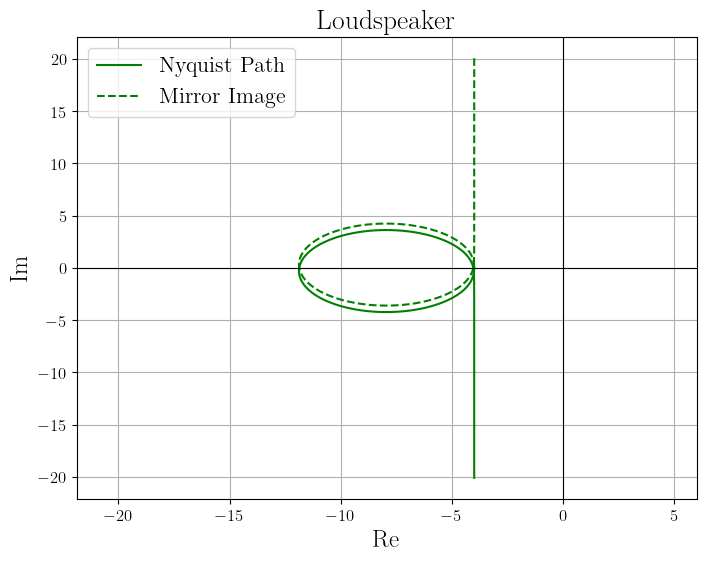

RC_Circuit_Moduled.txt


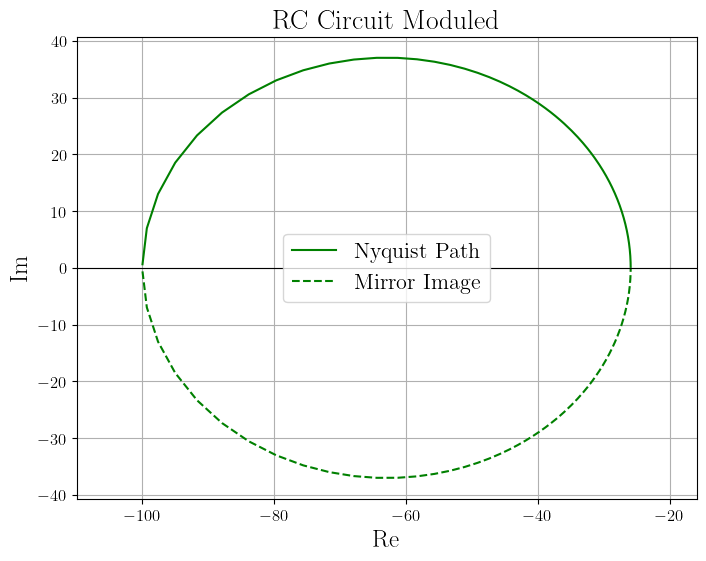

RLC_Circuit_Moduled.txt


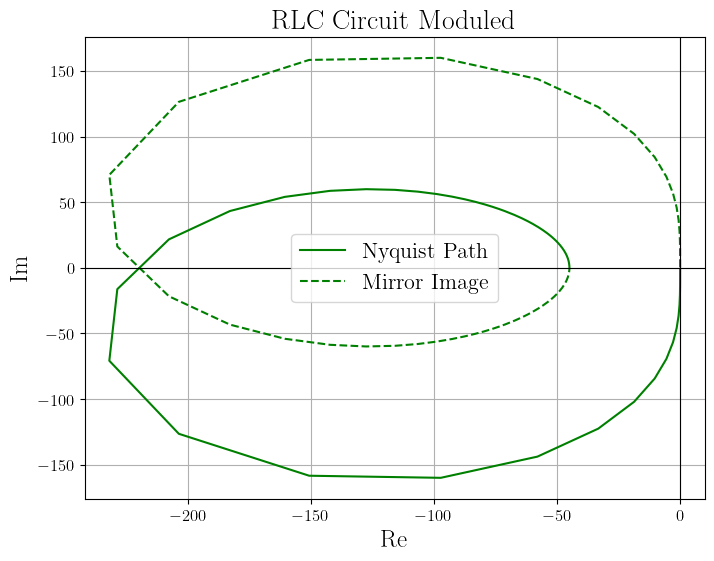

R_1000R.txt


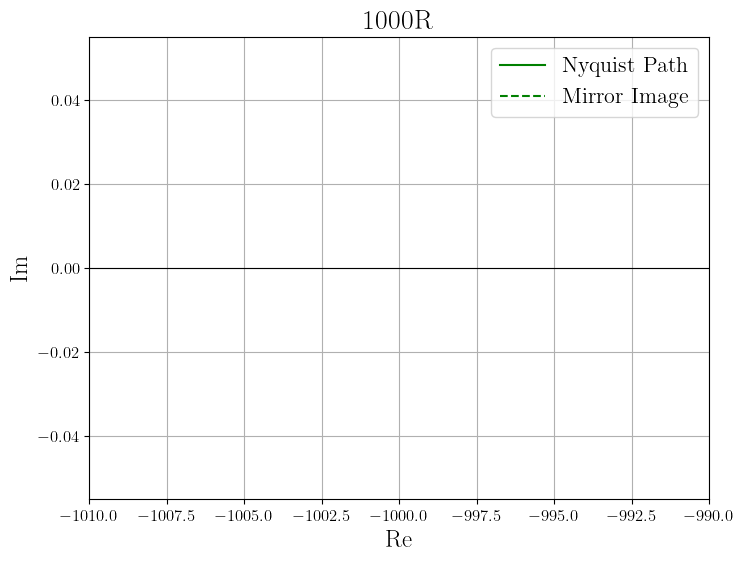

R_100R.txt


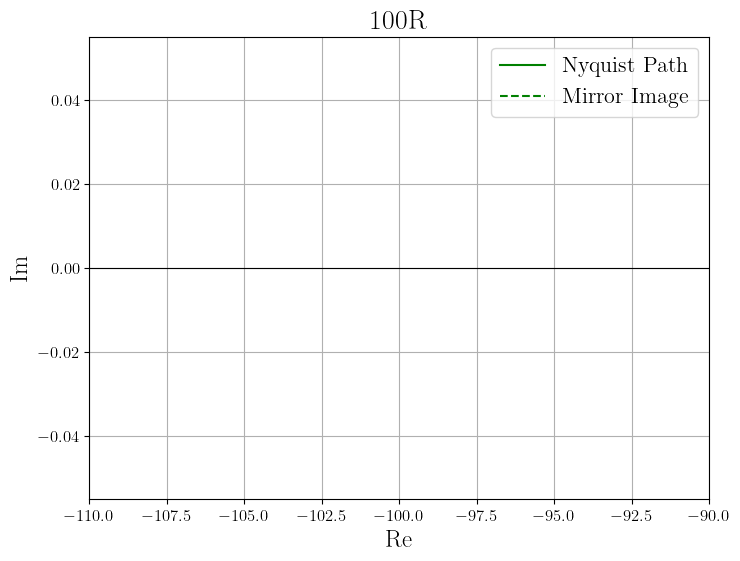

R_1MR_Moduled.txt


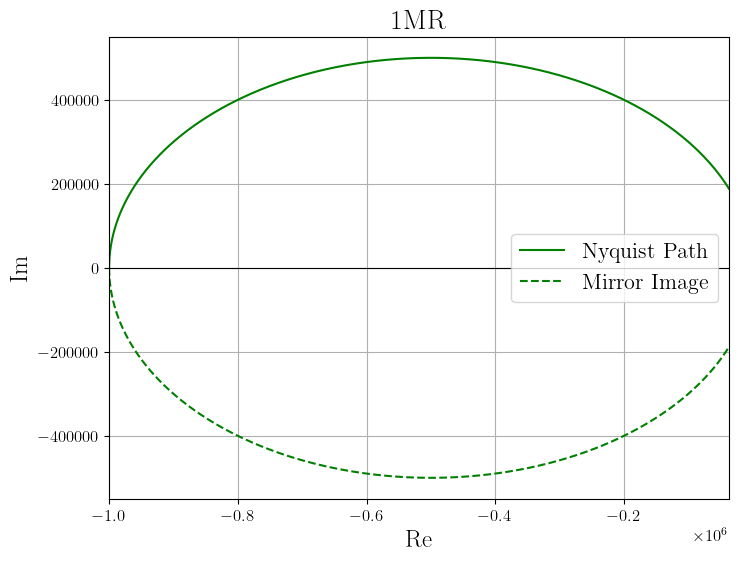

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Funktion für Nyquist-Plot
def nyquist_plot(real, imag, title="Nyquist Plot", xlabel="Re", ylabel="Im", grid=True, output_path=None, xlim=None):
    """
    Plots a Nyquist diagram given the real and imaginary components of the transfer function.

    Parameters:
        real (array-like): Real part of the transfer function.
        imag (array-like): Imaginary part of the transfer function.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        grid (bool): Whether to display a grid (default: True).
        output_path (str): If provided, saves the plot to the given file path.
        xlim (tuple): Limits for the x-axis as (xmin, xmax).

    Returns:
        None
    """
    plt.figure(figsize=(8, 6))
    plt.plot(real, imag, label="Nyquist Path", color= 'green')
    plt.plot(real, -np.array(imag), linestyle='--', color='green', label="Mirror Image")
    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0, color='black', linewidth=0.8)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if xlim:
        plt.xlim(xlim)  # Set custom x-axis limits
    if grid:
        plt.grid()
    plt.legend()
    
    if output_path:
        plt.savefig(output_path)  # Save the plot if output_path is provided
    plt.show()

# Daten aus Dateien in einem Ordner einlesen
def process_folder(folder_path, custom_titles):
    """
    Reads all text files in the given folder and generates Nyquist plots for each.

    Parameters:
        folder_path (str): Path to the folder containing the text files.
        custom_titles (list): List of custom titles for each plot.

    Returns:
        None
    """
    # Dateien sortieren, um sicherzustellen, dass sie in der gewünschten Reihenfolge verarbeitet werden
    filenames = sorted([f for f in os.listdir(folder_path) if f.endswith(".txt")])
    
    if len(custom_titles) < len(filenames):
        raise ValueError("Die Anzahl der benutzerdefinierten Titel muss der Anzahl der Dateien entsprechen.")
    
    # Alle Dateien durchlaufen
    for i, filename in enumerate(filenames):
        file_path = os.path.join(folder_path, filename)
        
        print(filename)


        # Listen für die Daten
        spalte_eins_x = []  # Frequenz
        spalte_zwei_y1 = []  # Realteil
        spalte_drei_y2 = []  # Imaginärteil

        # Datei öffnen und einlesen
        with open(file_path, 'r') as datei:
            next(datei)  # Überspringe die erste Zeile (Header)
            for zeile in datei:
                # Die Zeile in Spalten aufteilen (Tab-Trennung angenommen)
                spalten = zeile.strip().split('\t')  # Passe den Delimiter an, falls nötig

                # Frequenz einlesen (nicht für den Plot notwendig, aber zur Vollständigkeit)
                spalte_eins_x.append(float(spalten[0]))

                # Real- und Imaginärteil aufsplitten und einlesen
                spalte2_und_3 = spalten[1].split(',')
                spalte_zwei_y1.append(float(spalte2_und_3[0]))  # Realteil
                spalte_drei_y2.append(float(spalte2_und_3[1]))  # Imaginärteil

        # Titel des Plots basierend auf dem benutzerdefinierten Namen
        title = custom_titles[i]
        
        # Anpassung der X-Achse
        x_min, x_max = min(spalte_zwei_y1) - 10, max(spalte_zwei_y1) + 10

        # Optional: Speicherpfad für den Plot
        output_file = os.path.join(folder_path, f"{title.replace(' ', '_')}_nyquist.png")
        
        # Nyquist-Plot erstellen
        nyquist_plot(spalte_zwei_y1, spalte_drei_y2, title=title, output_path=output_file, xlim=(x_min, x_max))

# Hauptfunktion
if __name__ == "__main__":
    # Pfad zum Ordner mit den Textdateien
    folder_path = r'D:\Impedanz\ImpedanzGit\impedanz\Sarah_Impedanz\sarah_nyquist'
    
    # Benutzerdefinierte Titel für die Plots (in derselben Reihenfolge wie die Dateien)
    custom_titles = [
        "Loudspeaker",
        "RC Circuit Moduled",
        "RLC Circuit Moduled",
        "1000R",
        "100R",
        "1MR"
        # Füge weitere Titel hinzu, die zu den Dateien passen
    ]

    # Alle Dateien im Ordner einlesen und Nyquist-Plots erstellen
    process_folder(folder_path, custom_titles)
